<h3>Task 1:</h3>

<ol type="a">
  <li>Load any image, find its dimensions and number of channels and display it.</li>
  <li>Find the array size, creation date/time, coding method, bit depth, height and width.</li>
  <li>What happens if you convert a double having values outside the range [0 255] to an uint8?</li>
</ol>

In [124]:
import cv2

imagePath = 'RGB_Bit_Depth_48.png'
imgT1 = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)

hT1, wT1, cT1 = imgT1.shape

print(f"The dimensions of the image is {wT1}x{hT1} and has {cT1} channels.")

The dimensions of the image is 1080x1080 and has 3 channels.


In [125]:
import os
import datetime

print(f"The size of the image is {imgT1.size}")

modificationTime = os.path.getmtime(imagePath)
creationDate = datetime.datetime.fromtimestamp(modificationTime).strftime('%Y-%m-%d %H:%M:%S')

print(f"The creation date/time of this image file is {creationDate}")

fileExtension = os.path.splitext(imagePath)[-1].lower()

codingMethods = {
    '.jpg': 'JPEG',
    '.jpeg': 'JPEG',
    '.png': 'PNG',
    '.exr': 'OpenEXR',
    '.tiff': 'TIFF',
    '.bmp': 'BMP',
}

print(f"The coding method for this image file is {codingMethods[fileExtension]}")

print(f"The bit depth of this image is {imgT1.dtype.itemsize * 8 * imgT1.shape[2]}")

print(f"This image has a height of {hT1}px and a width of {wT1}px")

The size of the image is 3499200
The creation date/time of this image file is 2024-10-09 19:15:52
The coding method for this image file is PNG
The bit depth of this image is 48
This image has a height of 1080px and a width of 1080px


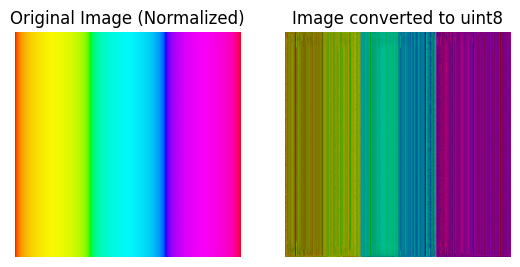

In [133]:
import numpy as np
import matplotlib.pyplot as plt

imgT1 = imgT1[..., ::-1]
imgT1_uint8 = imgT1.astype(dtype = np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(cv2.normalize(imgT1, None, 0, 255, cv2.NORM_MINMAX))
plt.axis("Off")
plt.title("Original Image (Normalized)")

plt.subplot(1, 2, 2)
plt.imshow(imgT1_uint8)
plt.axis("Off")
plt.title("Image converted to uint8")

plt.show()

<h3>Task 2:</h3>

Load any image, binarize it, using the function ‘cv2.threshold’ with a threshold of 127 and display both original and binarized images. 

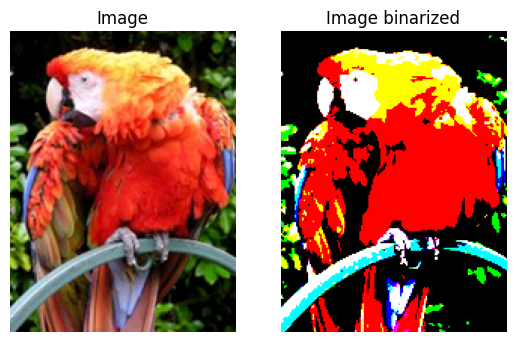

In [135]:
imagePathT2 = 'RGB_Bit_Depth_24.png'

imgT2 = cv2.imread(imagePathT2)
imgT2 = cv2.cvtColor(imgT2, cv2.COLOR_BGR2RGB)

_, imgT2Binary = cv2.threshold(imgT2, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.imshow(imgT2)
plt.axis("Off")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(imgT2Binary)
plt.axis("Off")
plt.title("Image binarized")

plt.show()

<h3>Task 3:</h3>

The function rgb2gray() can be used to convert three channel-colored images into single channel gray scale images.<br>
Write program which reads an image.<br>
Find the size of the image and the number of channels in it.<br>
Use if else.

If it is a three-channel image, then:
- display that it is a three-channel image
- then convert it to grayscale. 
- Now binarize the gray image.
- Finally, display it.

If it is a one-channel image, then:
- display that it is a one-channel image
- Just display image.

The size of the image is 90000 and has 3 channels.


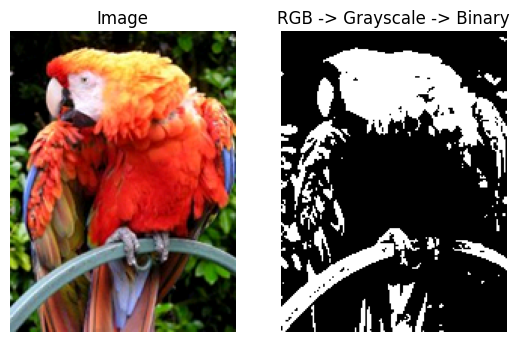

In [137]:
imagePathT3 = 'RGB_Bit_Depth_24.png'

imgT3 = cv2.imread(imagePathT3)
imgT3 = cv2.cvtColor(imgT3, cv2.COLOR_BGR2RGB)
cT3 = imgT3.shape[2]

print(f"The size of the image is {imgT3.size} and has {cT3} channels.")

if cT3 == 3:
    plt.subplot(1, 2, 1)
    plt.imshow(imgT3)
    plt.axis("Off")
    plt.title("Image")

    _, imgT3Binary = cv2.threshold(cv2.cvtColor(imgT3, cv2.COLOR_RGB2GRAY), 127, 255, cv2.THRESH_BINARY)

    plt.subplot(1, 2, 2)
    plt.imshow(imgT3Binary, cmap="gray")
    plt.axis("Off")
    plt.title("RGB -> Grayscale -> Binary")
else:
    plt.subplot(1, 2, 1)
    plt.imshow(imgT3)
    plt.axis("Off")
    plt.title("Image")

plt.show()

<h3>Task 4:</h3>

Write a program which reads an image. Binarize the image using your own implementation rather than the functions. Use two loops (nested), compare each value with a given threshold and generate the output image.

Text(0.5, 1.0, 'Image Binarized')

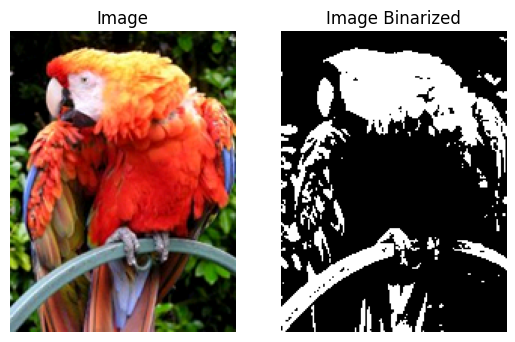

In [152]:
imagePathT4 = 'RGB_Bit_Depth_24.png'

imgT4 = cv2.imread(imagePathT4)
imgT4 = cv2.cvtColor(imgT4, cv2.COLOR_BGR2RGB)

height, width, channels = imgT4.shape

multiChannel = True if channels > 1 else False

imgT4_Binarized = None

if multiChannel:
    imgT4_Binarized = np.zeros((height, width), dtype=np.uint8)
else:
    imgT4_Binarized = imgT4.copy()

threshold = 127

for i in range(height):
    for j in range(width):
        if multiChannel:
            imgT4_Binarized[i, j] = int(0.299 * imgT4[i, j][0] + 0.587 * imgT4[i, j][1] + 0.114 * imgT4[i, j][2])

        if imgT4_Binarized[i, j] > threshold:
            imgT4_Binarized[i, j] = 255
        else:
            imgT4_Binarized[i, j] = 0

plt.subplot(1, 2, 1)
plt.imshow(imgT4)
plt.axis("Off")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(imgT4_Binarized, cmap="gray")
plt.axis("Off")
plt.title("Image Binarized")

<h3>Task 5:</h3>

Open webcam and perform gray scaling on the video frames, you can use opencv functions for gray scale.

In [158]:
webCam = cv2.VideoCapture(0)

if not webCam.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = webCam.read()
    
    if not ret:
        print("Error: Failed to capture video frame.")
        break

    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Original Frame', frame)

    cv2.imshow('Grayscale Frame', grayFrame)

    # Press any key to break loop
    if cv2.waitKey(1) != -1:
        break

webCam.release()
cv2.destroyAllWindows()
